# ***Goal: 다음 분기에 어느 장르의 게임을 출시하는게 적합할 까?*** :)


---


**사전파악이 필요한 세부사항**
*   지역에 따라 선호하는 게임 장르가 다른지
*   연도별 게임의 트렌드는 있는지
*   출고량이 높은 게임에 대한 분석 및 시각화 프로세스


---
**목표 달성 방향성**


*  지역 및 연도를 통한 트랜드의 방향을 파악하고, 
  출고량이 어느정도 유지되고 있는 게임을 출시하여 점유율을 
  가져올 수 있는 방향으로 분석 할 예정.



---
**처리순서**
1.   데이터셋 불러오기
2.   결측치, 이상치 확인 및 제거/ 데이터 스케일링(전처리)
3.   feature engineering(변수 다듬기, 변수 생성)
4.   예측 및 해석


# ***데이터셋 불러오기***/ ***결측치, 이상치 확인 및 제거***

In [1]:
# 한글 깨짐 현상 제거
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,036 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and d

NameError: ignored

In [2]:
from google.colab import files   #파일 업로드
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리 및 시각화 대비 작업.

In [4]:
df = pd.read_csv(io.StringIO(uploaded['vgames2.csv'].decode('utf-8')))
del df['Unnamed: 0'] # 불필요한 열 제거

In [5]:
df.shape
# (16598, 9)  ----> 전체 행, 열 갯수

(16598, 9)

In [6]:
df.info()  # 데이터 타입 확인 / 특이사항: Year=float, 그 외 = object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()  #결측치 확인====> Year(271)/ Genre(50)/ Publisher(58)

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
df.dropna(subset=['Genre', 'Year'], axis=0, inplace=True) # 위에서 발견된 결측치 제거

In [9]:
df.fillna({'Publisher':'Unknown'}, inplace=True)   # 해당 결측치 대체

In [10]:
df.shape 

# (16277, 9) ======> 321개의 열(row)가 제거되었고, 분석하는데 필요한 데이터에는 영향이 없을것으로 보인다...

(16277, 9)

In [11]:
df['Year'] = df['Year'].round(0).astype(int) # Year 변수형태가 float이므로 int로 수정

In [12]:
def fix_Y(x):
    if x >= 0 and x <= 20:
        x = x + 2000
    elif x >= 21 and x <= 99:
        x = x + 1900
    else:
        x
    return x

df['Year'] = df['Year'].apply(fix_Y)   # 데이터 상 Year 열에 1~99 사이의 숫자(이상치)를 발견하여 수정.

In [13]:
df #데이터 1차 점검

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [14]:
df_sorted_by_values = df.sort_values(by='NA_Sales' ,ascending=False)
df_sorted_by_values.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13057,Mark Davis Pro Bass Challenge,PS2,2002,Sports,Natsume,90K,0.07,0,0.02
14347,Animal Planet: Vet Life,Wii,2009,Simulation,Activision,90K,0,0,0.01
13798,King of Clubs: Mini Golf,Wii,2008,Sports,Oxygen Interactive,90K,0,0,0.01
10650,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13


In [15]:
# Sales : object -> float
# value 사이에 K, M이 확인됨. K=1, M=0.001로 변경(한눈에 보기 쉽도록 단위값 수정)

def tofloat(x):
    if x[-1] == 'K':
        x = float(x.replace('K', '')) / 1000       
    elif x[-1] == 'M':
        x = float(x.replace('M', '')) / 1000000
    else:
        x
    return x

df['NA_Sales'] = df['NA_Sales'].apply(tofloat).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat).astype(float)

In [16]:
df_sorted_by_values = df.sort_values(by='NA_Sales' ,ascending=False)
df_sorted_by_values.head()  # K, M 단위값 수정되었는지 확인!

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31


In [17]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] # Sales 값을 더하고 Total Sales 컬럼 생성.

In [18]:
df.duplicated().sum()  # 중복값 확인 === 0 (없음)

0

In [19]:
df.describe() # 데이터프레임 요약

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,2006.407630,0.262304,0.146023,0.077353,0.047909,0.533589
std,5.828646,0.815212,0.506386,0.306786,0.189402,1.549215
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


***데이터 상으로 북미, 유럽의 출고량이 월등히 높으므로 다음 분기 게임 출시 지역은 북미, 유럽을 타겟지역으로 지정하는 것이 구매율을 더 높일 것으로 예측됨***

In [20]:
# 전체 출고량이 가장 높은 게임 장르 데이터셋
df1 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
df1 = df1.melt(id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'])
df1 = pd.crosstab(index=df1.Genre, columns=df1.variable, values=df1.value, aggfunc=sum).reset_index()

df1['Percentage'] = round(( df1['Total_Sales'] / df1['Total_Sales'].sum() ) * 100, 2)

In [21]:
values = df1['Percentage']
labels = df1['Genre']
explode = [0.15]*12

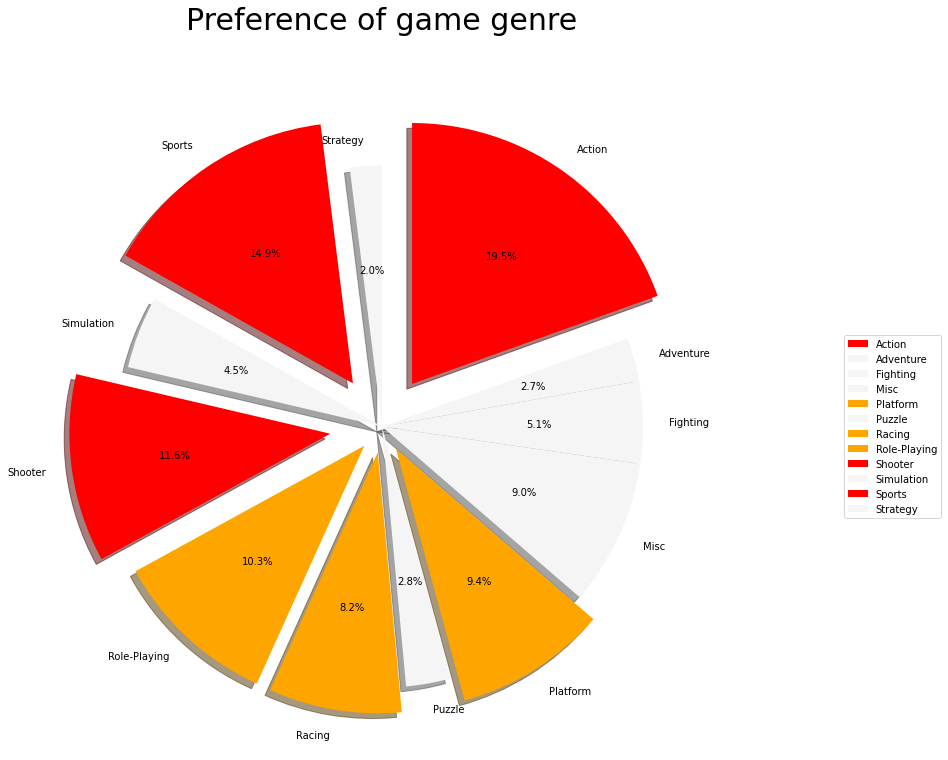

In [28]:
plt.figure(figsize=(12,12)) # 시각화 한 그림의 크기 설정
plt.pie(values, labels=labels, explode=[0.2,0,0,0,0.1,0,0.1,0.1,0.2,0,0.2,0], autopct='%.1f%%', shadow=True,
        colors=color,  startangle=90, counterclock=False) # 파이 차트를 통한 데이터프레임 시각화
color = ['red', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'orange', 'whitesmoke',
         'orange', 'orange' ,'red', 'whitesmoke', 'red', 'whitesmoke']
plt.title('Preference of game genre', fontsize=30, position=(0.5, 1.0+0.1))
plt.legend(labels, loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))  # 항목 나열
plt.show()

***선호하는 장로는 대체적으로 Action, Sports, Shooter.***
**`하지만, 앞으로 전망이 있는 Role-Playingm, Platform, Racing`**
---



# ***<가설검정을 통한 지역별로 선호하는 게임 장르 파악하기>***

In [29]:
# 가설검정을 위해 필요한 열만 가져와서 tidy data로 변환
df0 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Total_Sales']]
df_tidy = df1.melt(id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Total_Sales'])

In [30]:
# dataframe 변경
df_cr = pd.crosstab(df_tidy['variable'], df_tidy['Genre'], values=df_tidy['value'], aggfunc=sum)

In [31]:
from scipy.stats import chi2_contingency

chi2 = chi2_contingency(df_cr)
chi2

# 카이제곱검정 진행

(662.9108719126589,
 1.9936514247901114e-111,
 44,
 array([[ 463.87533827,   63.88900498,  120.80511609,  215.0650697 ,
          224.14242241,   65.76632252,  195.55574588,  243.75300323,
          276.88246034,  106.46799167,  353.56513855,   47.04240555],
        [ 245.73111099,   33.84425702,   63.99472647,  113.92754508,
          118.73613864,   34.83873827,  103.59276886,  129.12455427,
          146.674395  ,   56.39984651,  187.2959115 ,   24.92001973],
        [ 833.27023968,  114.76533047,  217.00508679,  386.32647047,
          402.63233379,  118.13760035,  351.28141074,  437.85928388,
          497.37051112,  191.25097114,  635.11741933,   84.50338553],
        [ 152.19332901,   20.96140828,   39.63507275,   70.56091628,
           73.53911412,   21.57733929,   64.1600825 ,   79.97316942,
           90.84264652,   34.93119109,  116.00154398,   15.43419043],
        [1695.07001795,  233.46000076,  441.4400021 ,  785.88000153,
          819.05000896,  240.32000042,  714.5900

H0 = 지역에 따라 선호하는 게임 장르는 없다.

H(a) = 지역에 따라 선호하는 게임 장르가 있다.








p-value = 2.647817402235075e-118     ->     p-value 값이 0.05보다 작은 값이 도출됨.

즉, H0 기각. H(a) 채택함  

In [32]:
df0 = pd.crosstab(index=df_tidy.Genre, columns=df_tidy.variable, values=df_tidy.value, aggfunc=sum).reset_index()
# dataframe 추출 및 변형

<BarContainer object of 12 artists>

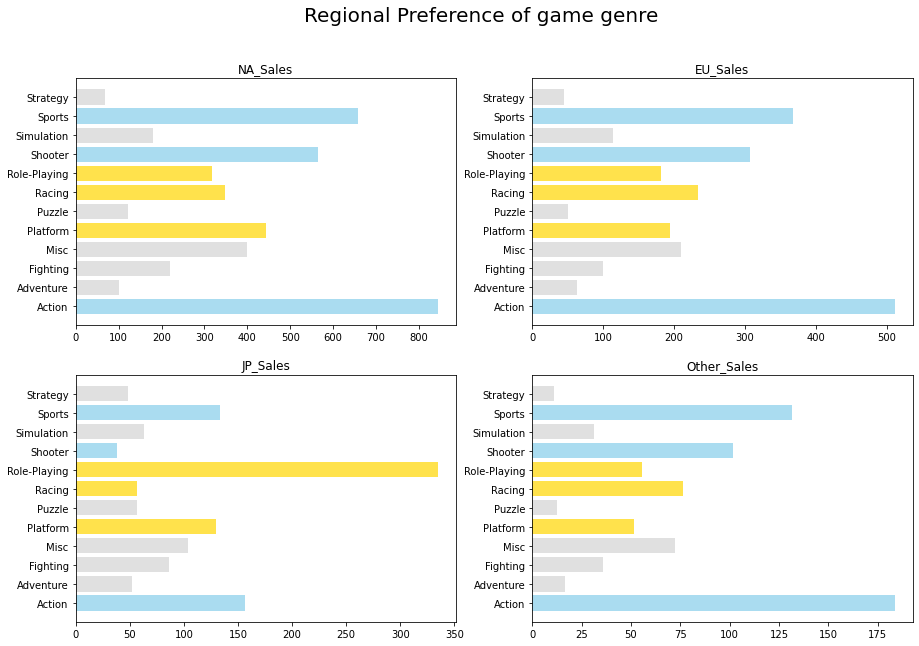

In [45]:
# 시각화 작업
fig, axs = plt.subplots(2,2, figsize=(15,10))
colors = ['skyblue', 'lightgray', 'lightgray', 'lightgray', 'gold', 'lightgray',
         'gold', 'gold' ,'skyblue', 'lightgray', 'skyblue', 'lightgray']
          
fig.suptitle('Regional Preference of game genre', fontsize=20)

axs[0,0].set_title('NA_Sales')
axs[0,0].barh(df0['Genre'], df0['NA_Sales'], color=colors, alpha=0.7)

axs[0,1].set_title('EU_Sales')
axs[0,1].barh(df0['Genre'], df0['EU_Sales'], color=colors, alpha=0.7)

axs[1,0].set_title('JP_Sales')
axs[1,0].barh(df0['Genre'], df0['JP_Sales'], color=colors, alpha=0.7)

axs[1,1].set_title('Other_Sales')
axs[1,1].barh(df0['Genre'], df0['Other_Sales'], color=colors, alpha=0.7)

# ***시각화 결과를 보면,***
*   북미, 유럽, 그 외 국가에서는  Action, Sports, Shooter 장르를 선호한다.
*   일본에서는 Role-Playing, Action, Sports 장르를 선호하는 것으로 나타났다.

***하지만 그래프를 자세히 보면 내가 이번 프로젝트의 목표를 설정한 대로 Action, Sports, Shooter을 제외한 Role-Playing, Platform, Racing 장르도 점유율을 높일 수 있는 발판을 마련하고 있는 것으로 보여진다***.



In [34]:
df2 = df[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df2 = df2.groupby(['Year', 'Genre']).sum().reset_index()
df2['Total_Sales'] = df2['NA_Sales'] + df2['EU_Sales'] + df2['JP_Sales'] + df2['Other_Sales']
df2 = df2.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

#연도별 게임 트랜드를 파악하기 위한 데이터셋을 새로 만듬

In [35]:
filt1 = (df2['Year'] >= 2010) & (df2['Year'] <= 2020)
df10 = df2[filt1]

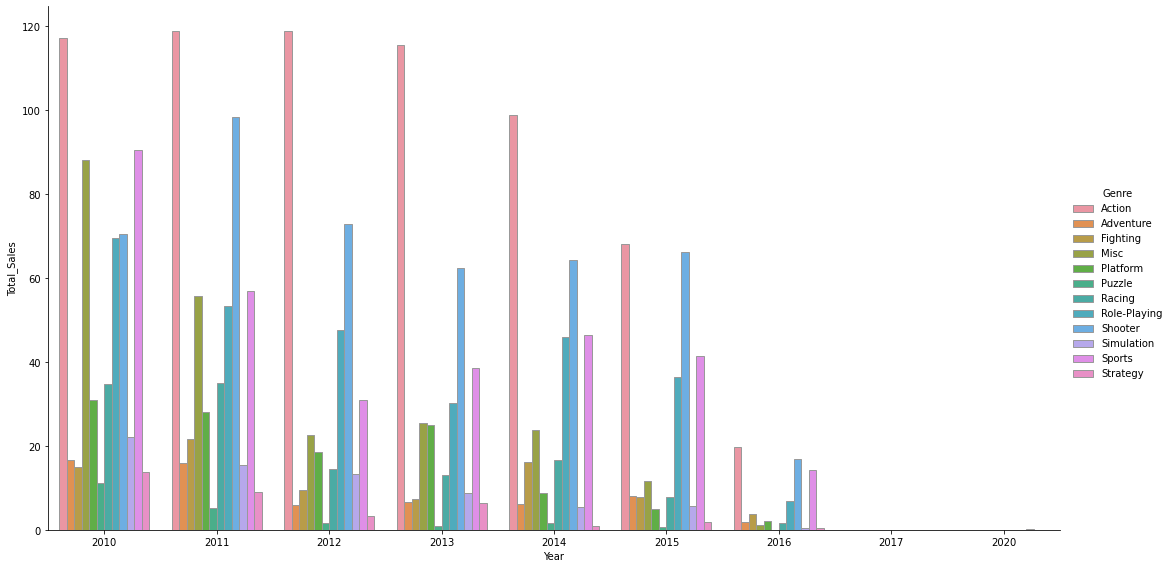

In [36]:
# 2020년 기준, 최근 10년간 게임 트랜드

sns.catplot(x='Year', y='Total_Sales', hue='Genre', kind='bar',
            data=df10, edgecolor='.6', height=8, aspect=15/8 )


# ***#출고량 높은 게임에 대한 분석 및 시각화/ 게임 플랫폼 점유율 파악#***


## [분석 조건]
*   장르는 Role-Playing, Platform, Racing, Misc, 이 4개의 장르에 한정하여 분석한다. (기존의 출고량이 월등히 높은 Action, Sports, Shooter를 포함하여 다른 장르와 함께 점유율을 균등하게 만들어 게임 장르의 생태계를 넓히고자 하는 의도.)
*   기간은 2020년 기준, 최근 10년으로 지정한다.



In [39]:
df_ex = (df['Genre'] == 'Role-Playing') | (df['Genre'] == 'Platform') | (df['Genre'] == 'Racing') 
df_ex0 = df['Year'] >= 2010

In [40]:
a = df[df_ex]
b = df[df_ex0]

In [41]:
df_ksm = pd.merge(a, b, how='inner')

In [42]:
df_ksm = df_ksm.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)\
                .sort_values('Total_Sales', ascending=False).round(2)

In [43]:
df_ksm.head(20)

,Name,Platform,Year,Genre,Publisher,Total_Sales
595,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,15.32
623,Mario Kart 7,3DS,2011,Racing,Nintendo,12.21
238,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,11.33
711,Super Mario 3D Land,3DS,2011,Platform,Nintendo,10.79
356,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,10.77
586,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,9.83
645,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,8.84
886,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,8.34
938,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,7.70
634,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,6.96


In [44]:
df_sorted_by_values = df_ksm.sort_values(by='Total_Sales' ,ascending=False)
df_sorted_by_values.head()

,Name,Platform,Year,Genre,Publisher,Total_Sales
595,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,15.32
623,Mario Kart 7,3DS,2011,Racing,Nintendo,12.21
238,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,11.33
711,Super Mario 3D Land,3DS,2011,Platform,Nintendo,10.79
356,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,10.77


# ***설정한 3개의 장르별 구매율 높은 게임 선정***

*   ***Role-Playing ===== Pokemon Black/Pokemon White           /    Pokemon Omega Ruby/Pokemon Alpha Sapphire***    [포켓몬 시리즈별 게임]
* ***Platform ===== Super Mario 3D Land***
* ***Racing ==== Mario Kart 7/ Gran Turismo 5***








# ***###결론###***


1. 지역에 따라 선호하는 게임 장르가 있음. 
2. 연도별 게임의 트랜드가 있음(시간이 지날수록 축소하는 경향이 있지만 트랜드는 존재한다.)


======> 북미, 유럽, 그 외 국가에는 Role-Playing, Platform, Racing 3개의 장르 모두 균등한 점유율을 가지고 있으므로 안정적인 수익성을 보장하기에 좋은 장르라고 생각된다. 반면, 일본은  Role-Playing의 점유율이 너무 불균형한 형태를 보이고 있다. 즉 일본에는 Role-Playing보다는 Platform, Racing 2개의 장르를 타겟으로 하는게 장기간으로 봤을 때의 점유율 안정성으로는 좀 더 안정적인 수익성을 가져올거라고 판단된다. 